In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import plotly.graph_objs as go

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [2]:
tesla=pd.read_csv(r'C:\Users\ARPAN\Desktop\Tesla.csv')
tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [3]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [4]:
tesla['Date']=pd.to_datetime(tesla['Date'])

In [5]:
print(f'Dataframe contains stock prices between {tesla.Date.min()}{tesla.Date.max()}')
print(f'Total days={(tesla.Date.max()-tesla.Date.min()).days}days')

Dataframe contains stock prices between 2010-06-29 00:00:002017-03-17 00:00:00
Total days=2453days


In [6]:
tesla.describe()

,Date,Open,High,Low,Close,Volume,Adj Close
count,1692,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,2013-11-06 02:53:37.021276416,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,2012-03-01 18:00:00,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,2013-11-05 12:00:00,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,2015-07-14 06:00:00,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,2017-03-17 00:00:00,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009
std,NaN,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187


<Axes: >

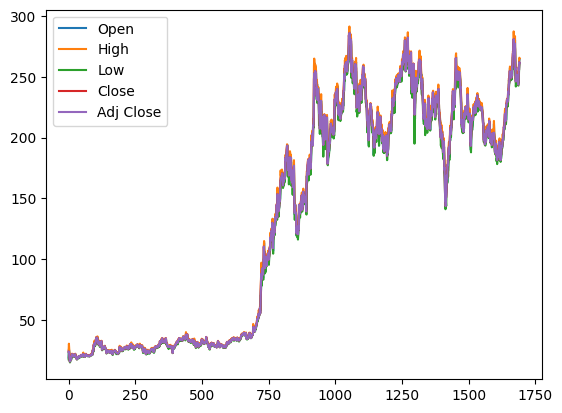

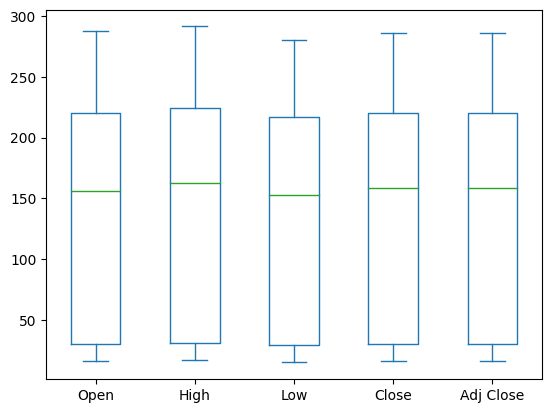

In [7]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='line')
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [8]:
layout=go.Layout(
    title="Stock Prices of Tesla",
    xaxis =dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=20,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=20,
            color='#7f7f7f'
        )
    )
)
date_array = np.array(tesla['Date'])
tesla_data=[{'x': date_array,'y':tesla['Close']}]
plot= go.Figure(data=tesla_data, layout=layout)

In [9]:
iplot(plot)
#plotting the plot value

In [10]:
#building the linear regression model
from sklearn.model_selection import train_test_split as tts

#for preprocessing
from sklearn.preprocessing import MinMaxScaler as mms
from sklearn.preprocessing import StandardScaler as ss

#for evolution 
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs

In [11]:
#spliting the data ionto training and testing set
X=np.array(tesla.index).reshape(-1,1)
Y=tesla['Close']
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.3,random_state=101)

In [12]:
#feature scaling
scale=ss().fit(X_train)

In [13]:
from sklearn.linear_model import LinearRegression as lr

In [14]:
#creating the model
lm=lr()
lm.fit(X_train,Y_train)

LinearRegression()

In [15]:
trace0 = go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode='markers',
    name='Actual'
)
trace1 = go.Scatter(
    x=X_train.T[0],
    y=lm.predict(X_train).T,
    mode='lines',
    name='Predicted'
)

tesla_data = [trace0, trace1]

layout = go.Layout(
    title='Actual vs Predicted (Train Dataset)',
    xaxis=dict(title='Day'),
    yaxis=dict(title='Price')
)

plot2 = go.Figure(data=tesla_data, layout=layout)

# Assuming you want to show the plot
plot2.show()


In [16]:
#CALCULATE SCORE FOR THE MODEL
score= f'''
{'Metrics'.ljust(10)}{'Train'.center(45)}{'Test'.center(50)}
{'r2_score'.ljust(10)}\t\t{rs(Y_train,lm.predict(X_train))}\t\t\t\t{rs(Y_test,lm.predict(X_test))}
{'mean_squared_error'.ljust(10)}\t{mse(Y_train,lm.predict(X_train))}\t\t\t\t{mse(Y_test,lm.predict(X_test))}
'''

print(score)


Metrics                       Train                                           Test                       
r2_score  		0.7929900409846331				0.7956409009085726
mean_squared_error	1836.922396703335				1823.8784763131885



1
1


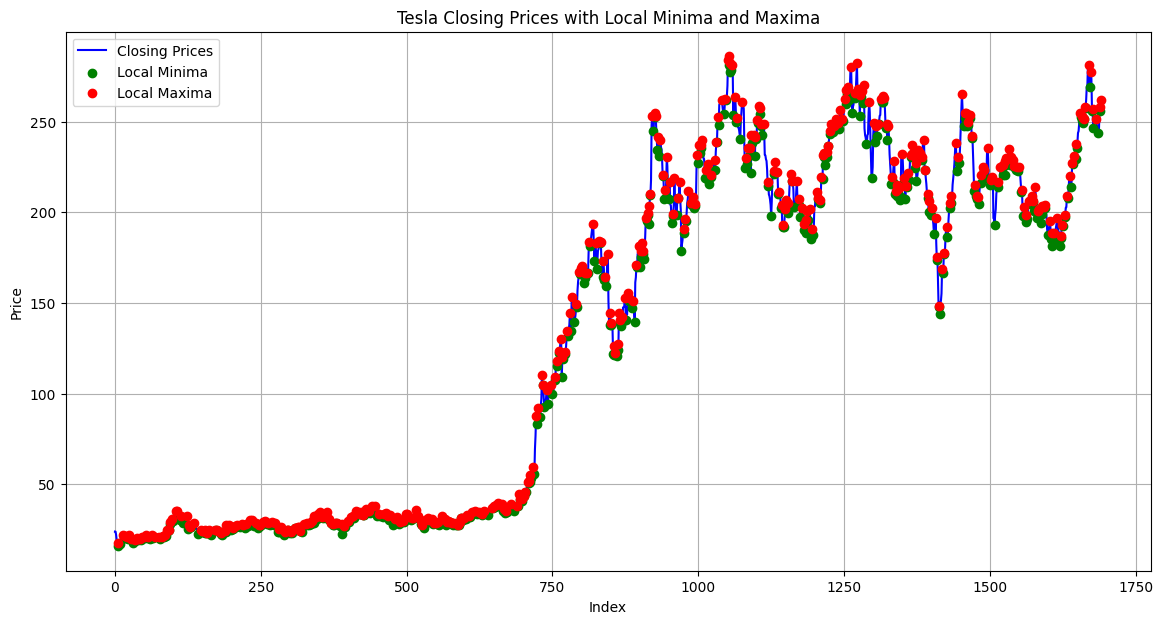

In [17]:
import scipy 
arr1=tesla['Close'].to_numpy()

bottoms=scipy.signal.argrelextrema(arr1,np.less,order=1)

tops=scipy.signal.argrelextrema(arr1,np.greater,order=1)
print(len(tops))
print(len(bottoms))

plt.figure(figsize=(14, 7))
plt.plot(arr1, label='Closing Prices', color='b')

# Plot the local minima
plt.scatter(bottoms, arr1[bottoms], color='g', label='Local Minima', zorder=5)

# Plot the local maxima
plt.scatter(tops, arr1[tops], color='r', label='Local Maxima', zorder=5)

plt.title('Tesla Closing Prices with Local Minima and Maxima')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
print(tops) #according to the rows of the data
print(bottoms)
avg_high =np.mean(tops)
avg_bottom=np.mean(bottoms)


print(f'Average of tops: {avg_high}')
print(f'Average of bottoms: {avg_bottom}')



std_high =np.std(tops)
std_bottom=np.std(bottoms)

print(f'Standard deviation of tops: {std_high}')
print(f'Standard deviation of bottoms: {std_bottom}')

(array([   6,   13,   17,   20,   24,   28,   34,   38,   40,   43,   46,
         49,   54,   57,   64,   68,   75,   80,   83,   86,   90,   92,
         94,   97,  104,  107,  113,  123,  127,  129,  135,  147,  149,
        151,  155,  158,  161,  172,  175,  177,  182,  189,  191,  194,
        196,  202,  206,  210,  218,  220,  225,  232,  235,  242,  247,
        249,  254,  256,  258,  262,  269,  275,  281,  284,  292,  295,
        297,  301,  308,  310,  313,  315,  318,  324,  328,  330,  334,
        338,  342,  345,  348,  351,  355,  358,  360,  364,  367,  371,
        374,  378,  380,  389,  392,  400,  405,  408,  414,  417,  420,
        422,  426,  430,  433,  436,  440,  445,  452,  461,  465,  468,
        471,  480,  483,  489,  491,  494,  499,  501,  504,  509,  511,
        516,  519,  525,  527,  532,  536,  539,  544,  547,  550,  554,
        560,  565,  569,  571,  573,  575,  577,  582,  586,  588,  591,
        593,  595,  599,  604,  607,  612,  618,  

In [19]:
# Calculate the number of days between consecutive highs and lows
days_between = []

# Find the minimum length of tops and bottoms to avoid index out of range error
min_length = min(len(tops[0]), len(bottoms[0]))

for i in range(min_length - 1):
    days_between.append(abs(bottoms[0][i]-tops[0][i] ))

print("Number of days between consecutive highs and lows:")
print(days_between)
print(np.std(days_between))
print(np.mean(days_between))
print(len(days_between))

Number of days between consecutive highs and lows:
[1, 5, 2, 1, 2, 1, 3, 3, 1, 1, 2, 1, 3, 1, 4, 3, 3, 1, 1, 2, 1, 1, 1, 2, 2, 4, 4, 2, 1, 1, 7, 1, 1, 3, 1, 2, 4, 2, 1, 4, 2, 1, 2, 1, 3, 1, 1, 5, 1, 3, 3, 1, 3, 4, 1, 2, 1, 1, 3, 3, 3, 5, 1, 6, 1, 1, 3, 3, 1, 2, 1, 2, 2, 1, 1, 2, 2, 3, 2, 1, 1, 3, 1, 1, 1, 2, 3, 2, 1, 1, 5, 1, 2, 1, 1, 1, 2, 2, 1, 3, 1, 2, 2, 2, 4, 4, 2, 2, 2, 1, 1, 3, 1, 2, 1, 2, 4, 1, 1, 2, 1, 4, 1, 1, 1, 3, 3, 1, 2, 1, 2, 1, 4, 2, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 7, 1, 3, 1, 3, 2, 2, 1, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 4, 1, 2, 1, 3, 1, 2, 1, 3, 2, 2, 3, 2, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 2, 1, 4, 3, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 3, 2, 4, 2, 1, 3, 4, 1, 4, 1, 3, 1, 1, 4, 1, 2, 1, 1, 1, 1, 5, 2, 3, 1, 1, 1, 1, 4, 1, 1, 1, 1, 3, 2, 5, 5, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 7, 5, 1, 2, 2, 4, 2, 1, 1, 2, 1, 1, 3, 3, 2, 4, 2, 1, 1, 3, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 3, 2, 3, 1, 2, 2, 1, 1, 2, 3, 1, 1, 3, 1, 2, 

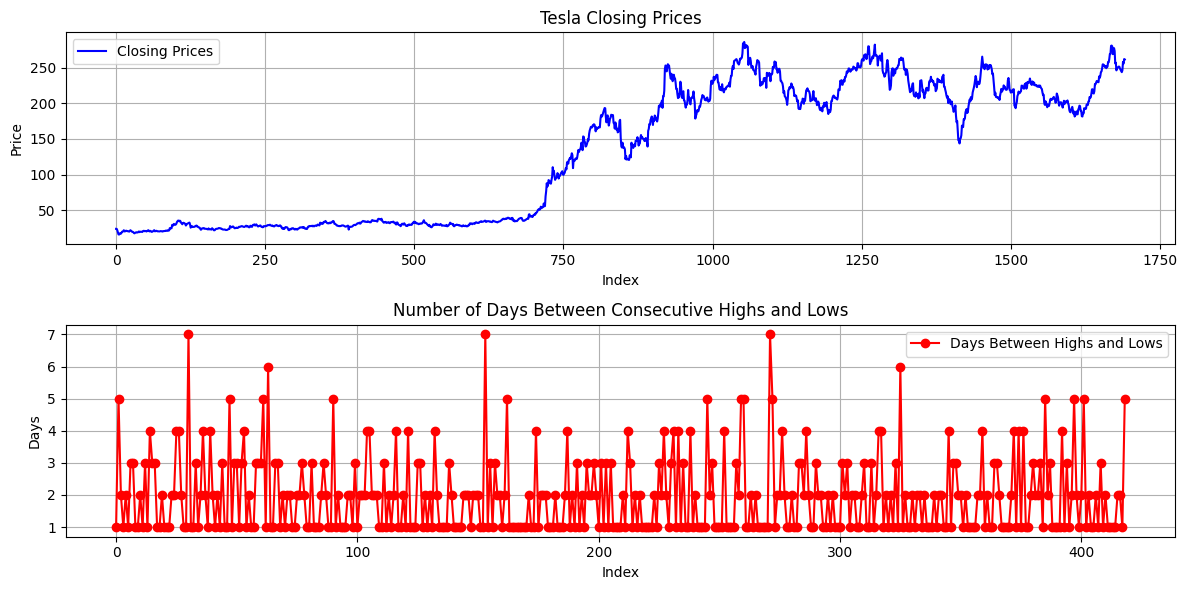

In [20]:

# Plotting the array against closing prices
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(arr1, color='b', label='Closing Prices')
plt.title('Tesla Closing Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(days_between, marker='o', linestyle='-', color='r', label='Days Between Highs and Lows')
plt.title('Number of Days Between Consecutive Highs and Lows')
plt.xlabel('Index')
plt.ylabel('Days')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
